# Prophet Model 
Prophet는 긴 시계열에 대해서 잘 학습하고, 아웃라이어나 노이즈에도 강건하다고 알려져 있다. 가볍고, 학습 속도가 빠르면서도, 분석이 용이하다고 판단으로 도입.

### Prophet
Prophet은 2017년에 Facebook(현 Meta)에서 Time-series를 다루기 위해서 만든 Library이다. 통계적인 지식 없이 Time-series 데이터를 기반으로 자동으로 Forecast를 수행해주며, 아웃라이어, 데이터 부재 등에도 비교적 강건하게 모델링을 수행한다.
*참고 : 공식 홈페이지 Prophet

Facebook에서는 전문적인 시계열 분석가나 통계 전문가의 도움 없이 ‘도메인’ 전문가가 스스로 시계열 데이터를 분석하고 적용할 수 있도록 도구를 확보했다. 기존의 통계 기반의 시계열 분석 모델인 ARIMA나 ETS, TBATS 등의 단점과 복잡성을 단순화한 모델을 개발하고 이를 Prophet으로 패키징하여 배포한 것.

In [379]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [380]:
df = pd.read_csv('life_all.csv')
df = df.set_index('구분1')
df.head()

,1996 년,1997 년,1998 년,1999 년,2000 년,2001 년,2002 년,2003 년,2004 년,2005 년,...,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020년,2021년
구분1,,,,,,,,,,,,,,,,,,,,,
강원,59.0,37.9,40.9,63.0,66.0,91.5,122.1,102.0,123.1,126.0,...,169.7,153.5,204.1,161.7,137.3,162.7,196.3,264.7,104507.8,114571.8
경기,579.0,638.3,636.8,594.0,565.6,573.9,710.3,757.8,745.7,736.7,...,816.8,803.8,842.9,847.3,1017.4,1129.9,1301.5,1572.0,674379.0,789086.5
경남,173.0,116.5,154.1,168.7,179.1,229.7,261.2,263.0,279.5,301.8,...,374.4,310.2,360.9,307.6,336.4,331.2,335.0,409.1,160810.0,181060.0
경북,59.0,72.7,84.4,112.5,114.3,103.9,111.9,149.8,194.6,208.7,...,181.1,206.9,185.6,216.1,280.5,271.0,318.6,320.6,146123.6,147046.8
광주,42.0,49.5,52.4,58.2,63.6,52.4,129.8,115.8,134.3,134.0,...,124.1,133.4,128.9,141.6,138.5,119.8,135.3,129.6,51582.7,73882.0


## 전처리

In [381]:
df['2020 년'] = df['2020년'].apply(lambda x: x / 365)
df['2021 년'] = df['2021년'].apply(lambda x: x / 365)
df.drop(['2020년','2021년'], axis = 1, inplace = True)



In [382]:
df_t = df.transpose()
df_t.drop(['세종'], axis = 1, inplace = True ) #데이터 부족 
df_t['울산'] = df_t['울산'].replace(0, np.nan) #측정되지 않는 값
df_t.head()

구분1,강원,경기,경남,경북,광주,대구,대전,부산,서울,울산,인천,전남,전북,제주,충남,충북
1996 년,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,NaN,100.0,79.0,63.0,19.9,64.0,48.9
1997 년,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,61.8,100.7,76.4,64.7,29.7,79.7,53.8
1998 년,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,52.2,152.9,85.8,64.5,14.9,77.0,73.0
1999 년,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,66.9,145.3,75.0,96.1,22.0,70.9,53.8
2000 년,66.0,565.6,179.1,114.3,63.6,261.4,114.9,260.9,652.2,74.3,201.9,73.3,92.5,16.2,77.7,55.1


In [383]:
df_t = df.transpose()


df_t.drop(['세종'], axis = 1, inplace = True ) #데이터 부족 
df_t['울산'] = df_t['울산'].replace(0, np.nan) #측정되지 않는 값



In [384]:
df_t.index = df_t.index.str.replace("년", "")  # '년'제거 

df_t.tail()

구분1,강원,경기,경남,경북,광주,대구,대전,부산,서울,울산,인천,전남,전북,제주,충남,충북
2017,162.700000,1129.900000,331.200000,271.000000,119.800000,285.700000,144.400000,389.500000,797.200000,96.400000,139.300000,189.900000,213.700000,62.700000,230.200000,173.100000
2018,196.300000,1301.500000,335.000000,318.600000,135.300000,301.100000,164.500000,340.300000,741.700000,100.400000,177.500000,201.100000,252.800000,47.400000,286.400000,176.300000
2019,264.700000,1572.000000,409.100000,320.600000,129.600000,349.700000,202.300000,508.300000,1111.100000,128.800000,254.600000,231.800000,217.400000,81.600000,246.900000,243.600000
2020,286.322740,1847.613699,440.575342,400.338630,141.322466,363.823014,232.464384,791.478356,1626.985753,163.529041,317.129863,268.378082,226.140548,127.195616,303.961644,268.112603
2021,313.895342,2161.880822,496.054795,402.867945,202.416438,297.570959,205.962740,534.403288,1530.355616,124.574247,404.730959,235.406301,236.488493,132.233699,349.818356,280.825205


In [385]:
#to_datetime
df_t.index = pd.to_datetime(df_t.index)
df_t.index = df_t.index.strftime('%Y')


In [386]:
#시간 열로 변경 
df_r = df_t.reset_index() 
df_r.head()

구분1,index,강원,경기,경남,경북,광주,대구,대전,부산,서울,울산,인천,전남,전북,제주,충남,충북
0,1996,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,NaN,100.0,79.0,63.0,19.9,64.0,48.9
1,1997,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,61.8,100.7,76.4,64.7,29.7,79.7,53.8
2,1998,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,52.2,152.9,85.8,64.5,14.9,77.0,73.0
3,1999,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,66.9,145.3,75.0,96.1,22.0,70.9,53.8
4,2000,66.0,565.6,179.1,114.3,63.6,261.4,114.9,260.9,652.2,74.3,201.9,73.3,92.5,16.2,77.7,55.1


## 예측

In [159]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

### 서울

#### In-Sample Forecast

우선 미래나 과거를 예측하기 전에 우리가 학습으로 사용한 데이터부터 잘 예측이 되는지 확인해 볼 필요가 있다.

이를 In-Sample Forecast라고 하며, 이 결과를 검토함으로써 모델이 얼마나 좋은지 확인할 수 있다. 즉 train set을 얼마나 잘 학습했는가를 판단하는 것이다.



In [351]:
# 데이터 준비
data = df_r[['index', '서울']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경

#모델생성
model = Prophet()

# 모델 학습
model.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.


Initial log joint probability = -52.8437
Iteration  1. Log joint probability =    11.3407. Improved by 64.1844.
Iteration  2. Log joint probability =    23.0879. Improved by 11.7472.
Iteration  3. Log joint probability =    30.2303. Improved by 7.14231.
Iteration  4. Log joint probability =    35.6005. Improved by 5.37021.
Iteration  5. Log joint probability =    35.7399. Improved by 0.139386.
Iteration  6. Log joint probability =    35.7574. Improved by 0.0175284.
Iteration  7. Log joint probability =    35.7729. Improved by 0.015545.
Iteration  8. Log joint probability =    35.8035. Improved by 0.0305954.
Iteration  9. Log joint probability =    35.8098. Improved by 0.00627523.
Iteration 10. Log joint probability =    35.8377. Improved by 0.027915.
Iteration 11. Log joint probability =    35.8832. Improved by 0.0455127.
Iteration 12. Log joint probability =    35.9296. Improved by 0.0463359.
Iteration 13. Log joint probability =    36.0665. Improved by 0.136979.
Iteration 14. Log joi

In [352]:
# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

In [353]:
# 예측
forecast = model.predict(last_5years)

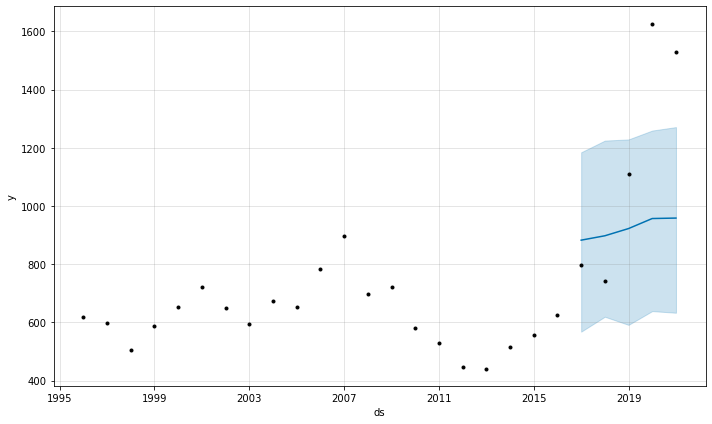

In [354]:
model.plot(forecast)
plt.show()

#### Out-Of-Sample Forecast
이제 미래를 예측한다

In [355]:
start_year = 2022
end_year = start_year + 5

# train set 이후 5년  생성
last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

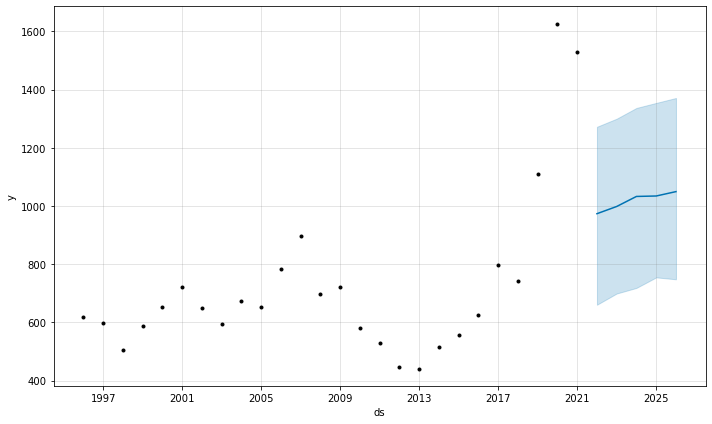

In [356]:
forecast = model.predict(last_5years)
model.plot(forecast)
plt.show()

#### 평가

In [357]:
# 마지막 5년 제외시키기
train = data.drop(data.index[-5:])
y_true = train['y'][-5:].values


# 모델 생성 후 학습
model = Prophet()
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.


Initial log joint probability = -56.6309
Iteration  1. Log joint probability =    25.9995. Improved by 82.6304.
Iteration  2. Log joint probability =    33.7117. Improved by 7.71219.
Iteration  3. Log joint probability =     34.342. Improved by 0.630318.
Iteration  4. Log joint probability =    34.4458. Improved by 0.103864.
Iteration  5. Log joint probability =    34.4932. Improved by 0.0473939.
Iteration  6. Log joint probability =    34.5121. Improved by 0.0189107.
Iteration  7. Log joint probability =    34.5597. Improved by 0.0475019.
Iteration  8. Log joint probability =    34.5836. Improved by 0.0239699.
Iteration  9. Log joint probability =    34.6462. Improved by 0.0625378.
Iteration 10. Log joint probability =    34.7138. Improved by 0.0676177.
Iteration 11. Log joint probability =    34.7168. Improved by 0.003061.
Iteration 12. Log joint probability =    34.7368. Improved by 0.0200024.
Iteration 13. Log joint probability =    34.7585. Improved by 0.0216198.
Iteration 14. Log

In [358]:


last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

# 예측과 비교 
#MAE
forecast = model.predict(last_5years)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

#RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: %.3f' % rmse)


MAE: 70.989
RMSE: 81.588


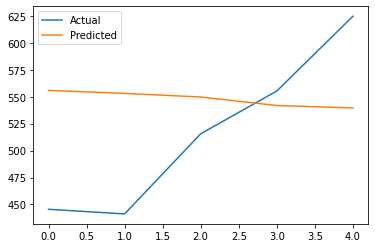

In [359]:
# 예측 결과 시각화
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [360]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
print('-------------')
data.tail()

          ds        yhat  yhat_lower  yhat_upper
0 2022-01-01  555.855955  411.762384  671.386544
1 2023-01-01  553.077170  418.001342  685.621213
2 2024-01-01  549.730272  423.470006  682.231384
3 2025-01-01  541.815115  408.434491  679.533476
4 2026-01-01  539.602530  407.416302  673.266277
-------------


,ds,y
21,2017,797.200000
22,2018,741.700000
23,2019,1111.100000
24,2020,1626.985753
25,2021,1530.355616


### 광주

In [342]:
# 데이터 준비
data = df_r[['index', '광주']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경


#### In-Sample Forecast

우선 미래나 과거를 예측하기 전에 우리가 학습으로 사용한 데이터부터 잘 예측이 되는지 확인해 볼 필요가 있다.

이를 In-Sample Forecast라고 하며, 이 결과를 검토함으로써 모델이 얼마나 좋은지 확인할 수 있다. 즉 train set을 얼마나 잘 학습했는가를 판단하는 것이다.



In [343]:
# 데이터 준비
data = df_r[['index', '광주']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경

#모델생성
model = Prophet()

# 모델 학습
model.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.



Initial log joint probability = -52.2407
Iteration  1. Log joint probability =    9.94733. Improved by 62.188.
Iteration  2. Log joint probability =    35.5565. Improved by 25.6092.
Iteration  3. Log joint probability =    35.5779. Improved by 0.0213547.
Iteration  4. Log joint probability =    35.6052. Improved by 0.0273471.
Iteration  5. Log joint probability =     35.675. Improved by 0.0697616.
Iteration  6. Log joint probability =    36.3249. Improved by 0.649951.
Iteration  7. Log joint probability =     36.361. Improved by 0.0360445.
Iteration  8. Log joint probability =    36.4392. Improved by 0.0781728.
Iteration  9. Log joint probability =    36.4603. Improved by 0.0211746.
Iteration 10. Log joint probability =    36.5079. Improved by 0.0475167.
Iteration 11. Log joint probability =    36.5314. Improved by 0.0235551.
Iteration 12. Log joint probability =    36.6852. Improved by 0.153785.
Iteration 13. Log joint probability =    36.8107. Improved by 0.125521.
Iteration 14. Log

In [344]:
# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

In [345]:
# 예측
forecast = model.predict(last_5years)

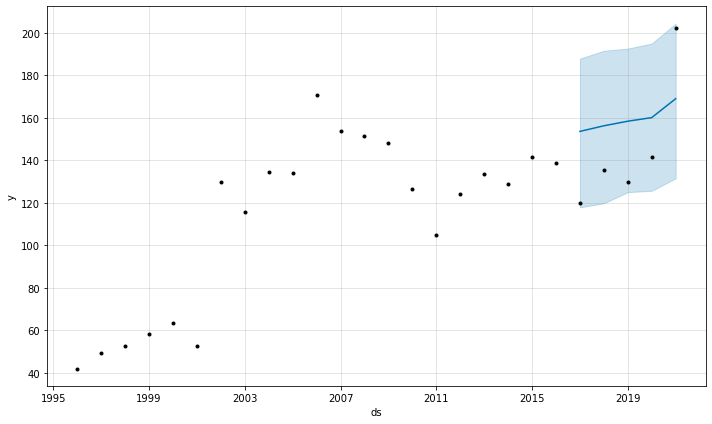

In [346]:
model.plot(forecast)
plt.show()

#### Out-Of-Sample Forecast
이제 미래를 예측한다

In [347]:
start_year = 2022
end_year = start_year + 5

# train set 이후 5년  생성
last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

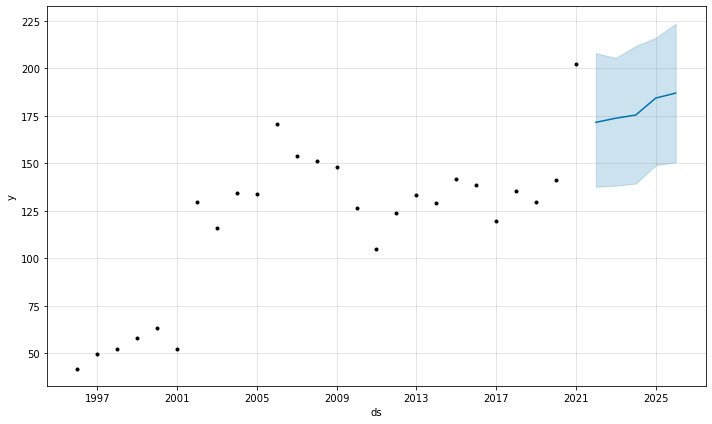

In [348]:
forecast = model.predict(last_5years)
model.plot(forecast)
plt.show()

#### 평가

In [349]:

# 마지막 5년 제외시키기
train = data.drop(data.index[-5:])
y_true = train['y'][-5:].values

# 모델 생성 후 학습
model = Prophet()
model.fit(train)


# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

# 예측과 비교 
#MAE
forecast = model.predict(last_5years)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

#RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: %.3f' % rmse)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.



Initial log joint probability = -56.9174
Iteration  1. Log joint probability =     9.6507. Improved by 66.5681.
Iteration  2. Log joint probability =    21.9778. Improved by 12.3271.
Iteration  3. Log joint probability =    26.1762. Improved by 4.19843.
Iteration  4. Log joint probability =    27.4324. Improved by 1.2562.
Iteration  5. Log joint probability =    27.6936. Improved by 0.261199.
Iteration  6. Log joint probability =    27.7088. Improved by 0.0151847.
Iteration  7. Log joint probability =    27.7219. Improved by 0.0130374.
Iteration  8. Log joint probability =    27.7653. Improved by 0.0434819.
Iteration  9. Log joint probability =     27.861. Improved by 0.0956074.
Iteration 10. Log joint probability =    27.8614. Improved by 0.000471291.
Iteration 11. Log joint probability =    27.9106. Improved by 0.0492089.
Iteration 12. Log joint probability =    27.9602. Improved by 0.0495681.
Iteration 13. Log joint probability =    28.0176. Improved by 0.0574365.
Iteration 14. Log

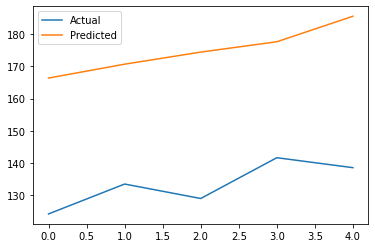

In [350]:
# 예측 결과 시각화
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


### 제주

In [362]:
# 데이터 준비
data = df_r[['index', '제주']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경


#### In-Sample Forecast

우선 미래나 과거를 예측하기 전에 우리가 학습으로 사용한 데이터부터 잘 예측이 되는지 확인해 볼 필요가 있다.

이를 In-Sample Forecast라고 하며, 이 결과를 검토함으로써 모델이 얼마나 좋은지 확인할 수 있다. 즉 train set을 얼마나 잘 학습했는가를 판단하는 것이다.



In [363]:
# 데이터 준비
data = df_r[['index', '제주']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경

#모델생성
model = Prophet()

# 모델 학습
model.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.


Initial log joint probability = -53.0239
Iteration  1. Log joint probability =    15.3639. Improved by 68.3878.
Iteration  2. Log joint probability =    25.0908. Improved by 9.72696.
Iteration  3. Log joint probability =    35.8475. Improved by 10.7566.
Iteration  4. Log joint probability =    36.9982. Improved by 1.15072.
Iteration  5. Log joint probability =     37.316. Improved by 0.317827.
Iteration  6. Log joint probability =    37.3474. Improved by 0.0314484.
Iteration  7. Log joint probability =    37.3553. Improved by 0.00786619.
Iteration  8. Log joint probability =    37.3945. Improved by 0.0391814.
Iteration  9. Log joint probability =    37.4141. Improved by 0.0196043.
Iteration 10. Log joint probability =    37.5163. Improved by 0.102228.
Iteration 11. Log joint probability =    37.7458. Improved by 0.229498.
Iteration 12. Log joint probability =    37.8309. Improved by 0.0850899.
Iteration 13. Log joint probability =    37.8557. Improved by 0.0247767.
Iteration 14. Log jo

In [364]:
# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

In [365]:
# 예측
forecast = model.predict(last_5years)

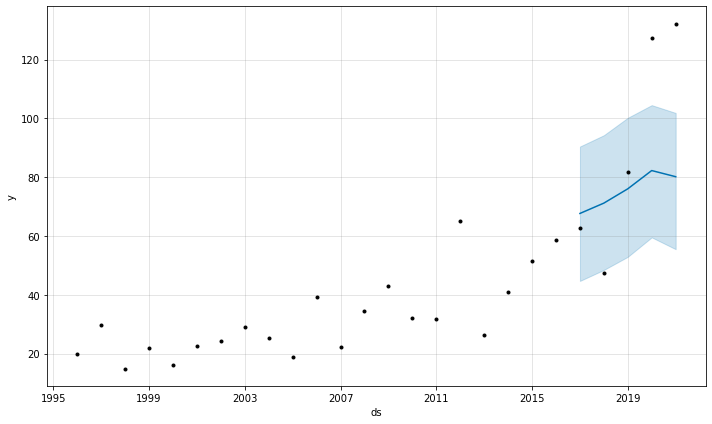

In [366]:
model.plot(forecast)
plt.show()

#### Out-Of-Sample Forecast
이제 미래를 예측한다

In [256]:
start_year = 2022
end_year = start_year + 5

# train set 이후 5년  생성
last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

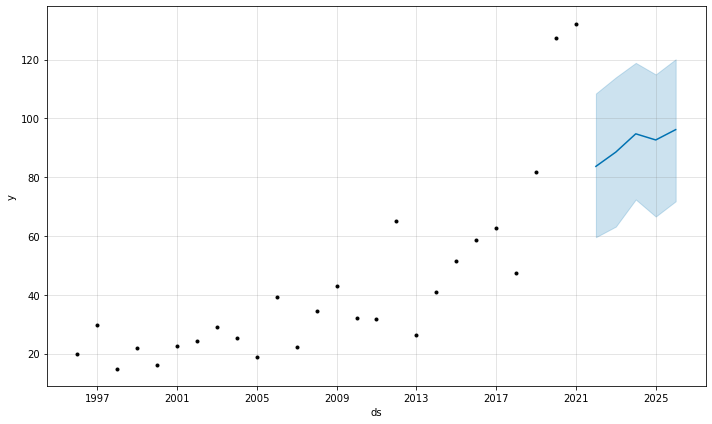

In [257]:
forecast = model.predict(last_5years)
model.plot(forecast)
plt.show()

#### 평가

In [367]:
# 마지막 5년 제외시키기
train = data.drop(data.index[-5:])
y_true = data['y'][-5:].values

# 모델 생성 후 학습
model = Prophet()
model.fit(train)


# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

# 예측과 비교 
#MAE
forecast = model.predict(last_5years)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

#RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: %.3f' % rmse)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.



Initial log joint probability = -56.8229
Iteration  1. Log joint probability =    10.1272. Improved by 66.9502.
Iteration  2. Log joint probability =    18.7244. Improved by 8.5972.
Iteration  3. Log joint probability =    25.9195. Improved by 7.19511.
Iteration  4. Log joint probability =    31.3473. Improved by 5.4278.
Iteration  5. Log joint probability =    31.5662. Improved by 0.218826.
Iteration  6. Log joint probability =    31.6935. Improved by 0.127322.
Iteration  7. Log joint probability =    31.8376. Improved by 0.144107.
Iteration  8. Log joint probability =    31.8508. Improved by 0.0132117.
Iteration  9. Log joint probability =    31.9042. Improved by 0.0533591.
Iteration 10. Log joint probability =    31.9352. Improved by 0.0310596.
Iteration 11. Log joint probability =    31.9475. Improved by 0.0122679.
Iteration 12. Log joint probability =      31.96. Improved by 0.0125465.
Iteration 13. Log joint probability =     31.961. Improved by 0.000924379.
Iteration 14. Log jo

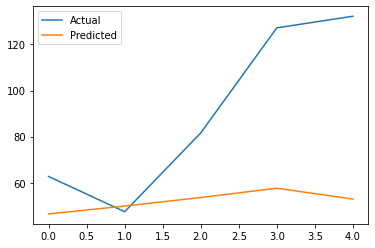

In [368]:
# 예측 결과 시각화
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


### 부산

#### In-Sample Forecast

우선 미래나 과거를 예측하기 전에 우리가 학습으로 사용한 데이터부터 잘 예측이 되는지 확인해 볼 필요가 있다.

이를 In-Sample Forecast라고 하며, 이 결과를 검토함으로써 모델이 얼마나 좋은지 확인할 수 있다. 즉 train set을 얼마나 잘 학습했는가를 판단하는 것이다.



In [326]:
# 데이터 준비
data = df_r[['index', '부산']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경


In [327]:
#모델생성
model = Prophet()

# 모델 학습
model.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.


Initial log joint probability = -52.1112
Iteration  1. Log joint probability =    14.4875. Improved by 66.5987.
Iteration  2. Log joint probability =     37.833. Improved by 23.3455.
Iteration  3. Log joint probability =    38.0136. Improved by 0.180664.
Iteration  4. Log joint probability =    38.0676. Improved by 0.0539902.
Iteration  5. Log joint probability =    38.0963. Improved by 0.0286546.
Iteration  6. Log joint probability =    38.1127. Improved by 0.0163858.
Iteration  7. Log joint probability =    38.1562. Improved by 0.0434804.
Iteration  8. Log joint probability =    38.1887. Improved by 0.0325724.
Iteration  9. Log joint probability =    38.2359. Improved by 0.0471297.
Iteration 10. Log joint probability =     38.282. Improved by 0.0461877.
Iteration 11. Log joint probability =    38.3357. Improved by 0.0536077.
Iteration 12. Log joint probability =    43.9621. Improved by 5.62643.
Iteration 13. Log joint probability =    44.1839. Improved by 0.221788.
Iteration 14. Log 

In [328]:
# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

In [329]:
# 예측
forecast = model.predict(last_5years)

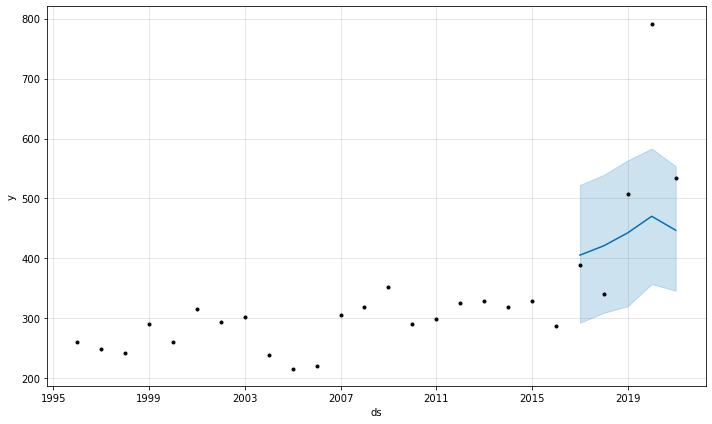

In [330]:
model.plot(forecast)
plt.show()

#### Out-Of-Sample Forecast
이제 미래를 예측한다

In [331]:
start_year = 2022
end_year = start_year + 5

# train set 이후 5년  생성
last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

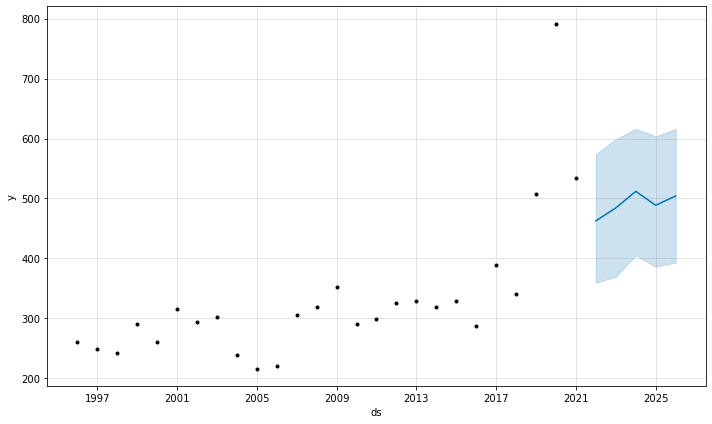

In [332]:
forecast = model.predict(last_5years)
model.plot(forecast)
plt.show()

#### 평가

In [333]:
# 마지막 5년 제외시키기
train = data.drop(data.index[-5:])
y_true = train['y'][-5:].values


# 모델 생성 후 학습
model = Prophet()
model.fit(train)


# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

# 예측과 비교 
#MAE
forecast = model.predict(last_5years)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

#RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: %.3f' % rmse)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.



Initial log joint probability = -56.5963
Iteration  1. Log joint probability =    25.8364. Improved by 82.4328.
Iteration  2. Log joint probability =    37.1353. Improved by 11.2989.
Iteration  3. Log joint probability =    40.0115. Improved by 2.87612.
Iteration  4. Log joint probability =    40.1067. Improved by 0.0952461.
Iteration  5. Log joint probability =    40.1142. Improved by 0.00746385.
Iteration  6. Log joint probability =    40.1151. Improved by 0.000944521.
Iteration  7. Log joint probability =    40.1219. Improved by 0.00681582.
Iteration  8. Log joint probability =    40.1295. Improved by 0.00758623.
Iteration  9. Log joint probability =    40.1415. Improved by 0.0119797.
Iteration 10. Log joint probability =    40.1435. Improved by 0.00201816.
Iteration 11. Log joint probability =    40.1456. Improved by 0.00212175.
Iteration 12. Log joint probability =    40.1471. Improved by 0.00148446.
Iteration 13. Log joint probability =    40.1484. Improved by 0.00132809.
Iterat

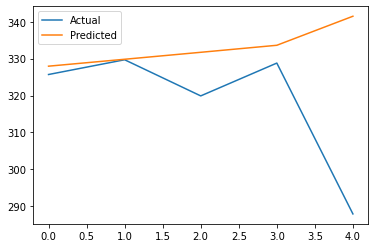

In [334]:
# 예측 결과 시각화
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [282]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
print('-------------')
data.tail()

          ds        yhat  yhat_lower  yhat_upper
0 2017-01-01  304.873208  211.031021  397.958563
1 2018-01-01  435.209953  338.542826  528.125596
2 2019-01-01  572.510130  484.230507  671.692280
3 2020-01-01  716.676388  619.075675  799.962065
4 2021-01-01  534.598055  439.530249  624.553719
-------------


,ds,y
21,2017,389.500000
22,2018,340.300000
23,2019,508.300000
24,2020,791.478356
25,2021,534.403288


### 충북

In [371]:
# 데이터 준비
data = df_r[['index', '충북']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경


#### In-Sample Forecast

우선 미래나 과거를 예측하기 전에 우리가 학습으로 사용한 데이터부터 잘 예측이 되는지 확인해 볼 필요가 있다.

이를 In-Sample Forecast라고 하며, 이 결과를 검토함으로써 모델이 얼마나 좋은지 확인할 수 있다. 즉 train set을 얼마나 잘 학습했는가를 판단하는 것이다.



In [372]:
# 데이터 준비
data = df_r[['index', '충북']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경


In [373]:
#모델생성
model = Prophet()

# 모델 학습
model.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.



Initial log joint probability = -52.4329
Iteration  1. Log joint probability =    19.9459. Improved by 72.3787.
Iteration  2. Log joint probability =    34.9677. Improved by 15.0218.
Iteration  3. Log joint probability =    43.4172. Improved by 8.44954.
Iteration  4. Log joint probability =    43.8868. Improved by 0.469573.
Iteration  5. Log joint probability =    43.9181. Improved by 0.0313503.
Iteration  6. Log joint probability =    43.9741. Improved by 0.0559726.
Iteration  7. Log joint probability =    44.0012. Improved by 0.0271006.
Iteration  8. Log joint probability =     44.008. Improved by 0.00676177.
Iteration  9. Log joint probability =    44.0271. Improved by 0.0191144.
Iteration 10. Log joint probability =     44.029. Improved by 0.00187492.
Iteration 11. Log joint probability =    44.0355. Improved by 0.00653366.
Iteration 12. Log joint probability =    44.0394. Improved by 0.0038875.
Iteration 13. Log joint probability =     44.052. Improved by 0.0126045.
Iteration 14.

In [374]:
# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

In [375]:
# 예측
forecast = model.predict(last_5years)

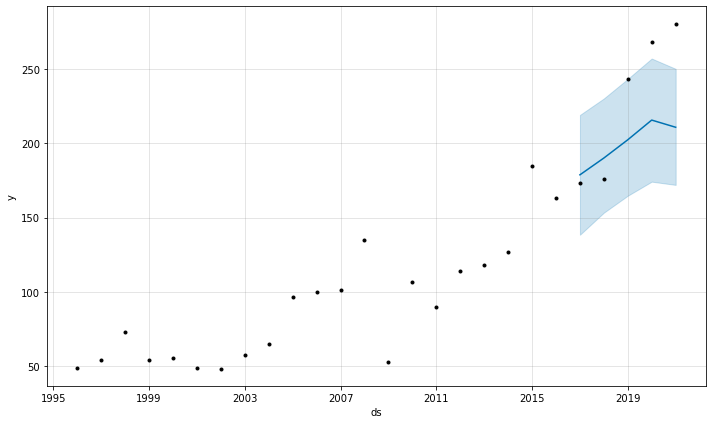

In [376]:
model.plot(forecast)
plt.show()

#### Out-Of-Sample Forecast
이제 미래를 예측한다

In [290]:
start_year = 2022
end_year = start_year + 5

# train set 이후 5년  생성
last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

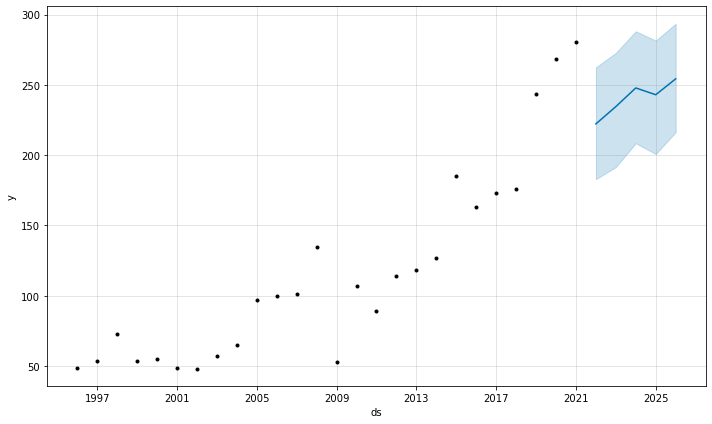

In [291]:
forecast = model.predict(last_5years)
model.plot(forecast)
plt.show()

#### 평가

In [377]:
# 마지막 5년 제외시키기
train = data.drop(data.index[-5:])
y_true = train['y'][-5:].values

# 모델 생성 후 학습
model = Prophet()
model.fit(train)


# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])



# 예측과 비교 
#MAE
forecast = model.predict(last_5years)
y_pred = forecast['yhat'].values


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

#RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: %.3f' % rmse)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.



Initial log joint probability = -56.7048
Iteration  1. Log joint probability =     18.713. Improved by 75.4178.
Iteration  2. Log joint probability =    30.2562. Improved by 11.5432.
Iteration  3. Log joint probability =    35.0674. Improved by 4.81125.
Iteration  4. Log joint probability =     35.137. Improved by 0.0695797.
Iteration  5. Log joint probability =    35.2102. Improved by 0.073171.
Iteration  6. Log joint probability =    35.2473. Improved by 0.0371171.
Iteration  7. Log joint probability =    35.2663. Improved by 0.0189487.
Iteration  8. Log joint probability =    35.2906. Improved by 0.0243694.
Iteration  9. Log joint probability =    35.3008. Improved by 0.01015.
Iteration 10. Log joint probability =    35.3027. Improved by 0.00191572.
Iteration 11. Log joint probability =    35.3037. Improved by 0.00105322.
Iteration 12. Log joint probability =    35.3068. Improved by 0.00308825.
Iteration 13. Log joint probability =    35.3093. Improved by 0.00246714.
Iteration 14. 

MAE: 593.505
RMSE: 699.002


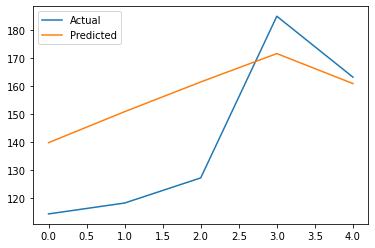

In [378]:
# 예측 결과 시각화
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [361]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
print('-------------')
data.tail()

          ds        yhat  yhat_lower  yhat_upper
0 2022-01-01  555.855955  411.762384  671.386544
1 2023-01-01  553.077170  418.001342  685.621213
2 2024-01-01  549.730272  423.470006  682.231384
3 2025-01-01  541.815115  408.434491  679.533476
4 2026-01-01  539.602530  407.416302  673.266277
-------------


,ds,y
21,2017,797.200000
22,2018,741.700000
23,2019,1111.100000
24,2020,1626.985753
25,2021,1530.355616


### 충남

In [387]:
# 데이터 준비
data = df_r[['index', '충남']]  # 날짜와 예측 대상 변수 선택
data.columns = ['ds', 'y']  # 열 이름 변경


#### In-Sample Forecast

우선 미래나 과거를 예측하기 전에 우리가 학습으로 사용한 데이터부터 잘 예측이 되는지 확인해 볼 필요가 있다.

이를 In-Sample Forecast라고 하며, 이 결과를 검토함으로써 모델이 얼마나 좋은지 확인할 수 있다. 즉 train set을 얼마나 잘 학습했는가를 판단하는 것이다.



In [388]:
#모델생성
model = Prophet()

# 모델 학습
model.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.


Initial log joint probability = -52.1712
Iteration  1. Log joint probability =    22.0919. Improved by 74.2631.
Iteration  2. Log joint probability =    33.7507. Improved by 11.6589.
Iteration  3. Log joint probability =    49.2502. Improved by 15.4995.
Iteration  4. Log joint probability =    49.6718. Improved by 0.421568.
Iteration  5. Log joint probability =    50.7698. Improved by 1.09795.
Iteration  6. Log joint probability =    50.7744. Improved by 0.00461785.
Iteration  7. Log joint probability =    50.7933. Improved by 0.018955.
Iteration  8. Log joint probability =    50.8091. Improved by 0.0158225.
Iteration  9. Log joint probability =    50.8171. Improved by 0.00794052.
Iteration 10. Log joint probability =    50.8764. Improved by 0.0593493.
Iteration 11. Log joint probability =    51.1216. Improved by 0.245162.
Iteration 12. Log joint probability =    51.1964. Improved by 0.0748165.
Iteration 13. Log joint probability =    51.2133. Improved by 0.0168496.
Iteration 14. Log j

In [389]:
# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

In [390]:
# 예측
forecast = model.predict(last_5years)

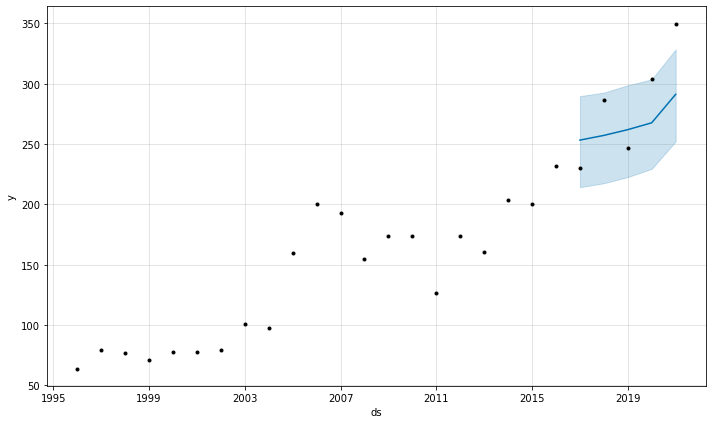

In [391]:
model.plot(forecast)
plt.show()

#### Out-Of-Sample Forecast
이제 미래를 예측한다

In [392]:
start_year = 2022
end_year = start_year + 5

# train set 이후 5년  생성
last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])

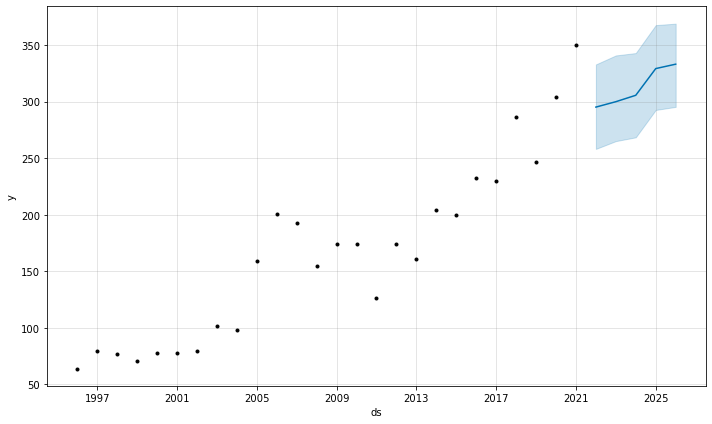

In [393]:
forecast = model.predict(last_5years)
model.plot(forecast)
plt.show()

#### 평가

In [394]:
# 마지막 5년 제외시키기
train = data.drop(data.index[-5:])
y_true = train['y'][-5:].values

# 모델 생성 후 학습
model = Prophet()
model.fit(train)


# train set 마지막 5년 날짜 생성
start_year = 2017
end_year = start_year + 5

last_5years = list()
for year in range(start_year, end_year):
    last_5years.append([str(year)])
last_5years = pd.DataFrame(last_5years, columns=['ds'])
last_5years['ds'] = pd.to_datetime(last_5years['ds'])



# 예측과 비교 
#MAE
forecast = model.predict(last_5years)
y_pred = forecast['yhat'].values


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

#RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE: %.3f' % rmse)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.



Initial log joint probability = -56.6366
Iteration  1. Log joint probability =    24.8744. Improved by 81.5109.
Iteration  2. Log joint probability =    34.3612. Improved by 9.48684.
Iteration  3. Log joint probability =     35.448. Improved by 1.08682.
Iteration  4. Log joint probability =    35.7427. Improved by 0.294671.
Iteration  5. Log joint probability =    35.7899. Improved by 0.0471823.
Iteration  6. Log joint probability =    35.8072. Improved by 0.0172717.
Iteration  7. Log joint probability =    35.8335. Improved by 0.0263086.
Iteration  8. Log joint probability =     35.969. Improved by 0.135502.
Iteration  9. Log joint probability =    36.0082. Improved by 0.0392743.
Iteration 10. Log joint probability =    36.0498. Improved by 0.0415222.
Iteration 11. Log joint probability =    36.0733. Improved by 0.0235544.
Iteration 12. Log joint probability =    36.0823. Improved by 0.0089908.
Iteration 13. Log joint probability =    36.0884. Improved by 0.0061159.
Iteration 14. Log

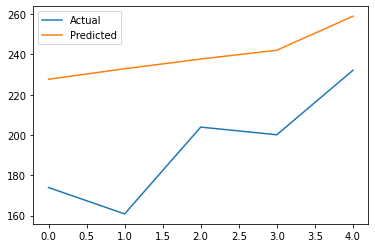

In [395]:
# 예측 결과 시각화
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [396]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
print('-------------')
data.tail()

          ds        yhat  yhat_lower  yhat_upper
0 2017-01-01  227.651366  198.047192  258.445481
1 2018-01-01  232.882144  200.612500  263.997774
2 2019-01-01  237.687787  206.004784  268.503085
3 2020-01-01  242.072149  207.286573  271.829997
4 2021-01-01  258.941967  224.808676  291.577124
-------------


,ds,y
21,2017,230.200000
22,2018,286.400000
23,2019,246.900000
24,2020,303.961644
25,2021,349.818356
